[0.         0.00541409 0.01095554 ... 0.10607404 0.10082625 0.09543328] [ 0.          0.00252852  0.00476416 ... -0.19672486 -0.19958257
 -0.20215583] [0.00000000e+00 8.01783746e-03 1.60356749e-02 ... 8.00180200e+00
 8.00981984e+00 8.01783768e+00]
[0.         0.00541409 0.01095554 ... 0.10607404 0.10082625 0.09543328]
[ 0.          0.00252852  0.00476416 ... -0.19672486 -0.19958257
 -0.20215583]
[0.00000000e+00 8.01783746e-03 1.60356749e-02 ... 8.00180200e+00
 8.00981984e+00 8.01783768e+00]


Text(0.5, 0.92, 'Particle Trajectory in Magnetic Field')

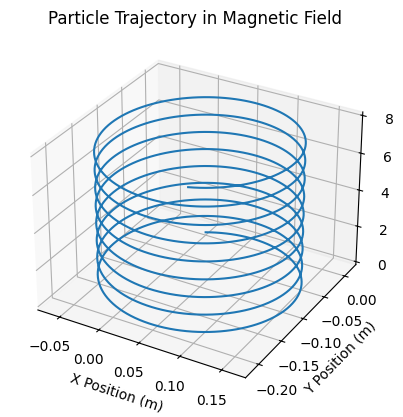

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.0   # charge in e
mass = 0.105 # GeV/c² for muon (you can replace with realistic values)
B = np.array([0.0, 0.0, 2.0])  # Tesla, uniform field in z-direction
h = 0.01  # Step size in meters

def lorentz_force(p, B):
    # Velocity from momentum (non-relativistic approx)
    v = p / np.linalg.norm(p)
    return q * np.cross(v, B)

def rk4_step(x, p):
    # RK4 integration for position and momentum
    def dp_dt(p): return lorentz_force(p, B)
    def dx_dt(p): return p / np.linalg.norm(p)  # direction of motion

    k1_x = h * dx_dt(p)
    k1_p = h * dp_dt(p)

    k2_x = h * dx_dt(p + 0.5 * k1_p)
    k2_p = h * dp_dt(p + 0.5 * k1_p)

    k3_x = h * dx_dt(p + 0.5 * k2_p)
    k3_p = h * dp_dt(p + 0.5 * k2_p)

    k4_x = h * dx_dt(p + k3_p)
    k4_p = h * dp_dt(p + k3_p)

    x_new = x + (1/6) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
    p_new = p + (1/6) * (k1_p + 2*k2_p + 2*k3_p + k4_p)

    return x_new, p_new

# Example usage
x = np.array([0.0, 0.0, 0.0])  # initial position
p = np.array([0.2, 0.1, 0.3])  # initial momentum (GeV/c)

trajectory = [x]
for i in range(1000):
    x, p = rk4_step(x, p)
    trajectory.append(x)

print(np.array(trajectory)[:, 0], np.array(trajectory)[:, 1],np.array(trajectory)[:, 2])
x = np.array(trajectory)[:, 0]
y = np.array(trajectory)[:, 1]
z = np.array(trajectory)[:, 2]
print(x)
print(y)
print(z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.set_title('Particle Trajectory in Magnetic Field')



